1. Load flat csv file
> As part of iteration process in data analysis, I have decided to load ratings as floats - this is one of identified issues

In [1]:
import pandas as pd
import numpy as np

archive = pd.read_csv('twitter-archive-enhanced.csv', dtype={'rating_numerator': float, 'rating_denominator': float})

2. Use requests library to load file with image predictions

In [2]:
import requests

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"  # Replace with your URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    #as data is in csv format, we can load it into datframe
    image_predictions = pd.read_csv(url, sep='\t')
    print(image_predictions)
else:
    print("Failed to retrieve data from the URL. Status code:", response.status_code)
    
#code generated with the help of ChatGPT

                tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2

3. Load additional data from json file 
> Minimum requirement was to load columns Tweet ID, Retweet Count and Favorite count, but since we're only interested in original tweets (not retweets), I think 'Is-Retweeted' column might be also useful

In [4]:
import pandas as pd
import json

# Define the file path
file_path = 'tweet-json.txt'

# Initialize empty lists to store data
tweet_ids = []
retweet_counts = []
favorite_counts = []
is_retweeted = []

# Open the file and read it line by line
with open(file_path, 'r') as file:
    for line in file:
        tweet_data = json.loads(line)  # Parse JSON data

        # Extract the required information
        tweet_id = tweet_data['id']
        retweets = tweet_data['retweet_count']
        favorites = tweet_data['favorite_count']
        retweeted = tweet_data['retweeted']

        # Append data to the lists
        tweet_ids.append(tweet_id)
        retweet_counts.append(retweets)
        favorite_counts.append(favorites)
        is_retweeted.append(retweeted)

# Create a Pandas DataFrame from the lists
data = {
    'tweet_id': tweet_ids,
    'retweet_count': retweet_counts,
    'fav_count': favorite_counts,
    'is_retweeted': is_retweeted
}

df_1 = pd.DataFrame(data)

# Now you have a Pandas DataFrame with the desired columns
print(df_1)

                tweet_id  retweet_count  fav_count  is_retweeted
0     892420643555336193           8853      39467         False
1     892177421306343426           6514      33819         False
2     891815181378084864           4328      25461         False
3     891689557279858688           8964      42908         False
4     891327558926688256           9774      41048         False
...                  ...            ...        ...           ...
2349  666049248165822465             41        111         False
2350  666044226329800704            147        311         False
2351  666033412701032449             47        128         False
2352  666029285002620928             48        132         False
2353  666020888022790149            532       2535         False

[2354 rows x 4 columns]


4. Now off to exploration of dataframes - let's start with Archive dataframe

In [5]:
print(archive.head(15))
print(archive.shape)

              tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0   892420643555336193                    NaN                  NaN   
1   892177421306343426                    NaN                  NaN   
2   891815181378084864                    NaN                  NaN   
3   891689557279858688                    NaN                  NaN   
4   891327558926688256                    NaN                  NaN   
5   891087950875897856                    NaN                  NaN   
6   890971913173991426                    NaN                  NaN   
7   890729181411237888                    NaN                  NaN   
8   890609185150312448                    NaN                  NaN   
9   890240255349198849                    NaN                  NaN   
10  890006608113172480                    NaN                  NaN   
11  889880896479866881                    NaN                  NaN   
12  889665388333682689                    NaN                  NaN   
13  8896388375799070

First issues noted with visual assessment:
  * timestamp has "+0000" at the end 
  * is column "source" having any relevant information? 
  * columns doggo/floffer/pupper => do they have relevant information? looking at just printed head, all these columns don;t have any meaningful values
    

In [6]:
print(archive.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   float64
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Issues with data types: \
    * timestamp column has object type, not datetime \
    * IDs with float type
 

In [7]:
print(archive.doggo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64


In [8]:
print(archive.floofer.value_counts())

None       2346
floofer      10
Name: floofer, dtype: int64


In [9]:
print(archive.pupper.value_counts())

None      2099
pupper     257
Name: pupper, dtype: int64


In [10]:
print(archive.puppo.value_counts())

None     2326
puppo      30
Name: puppo, dtype: int64


These 4 columns include very little non-empty values, and do not seem to bring much value. Melting them into one will also tidy up the dataset

In [11]:
name_counts  = archive.name.value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (name_counts)


None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Buddy               7
Toby                7
an                  7
Bailey              7
Leo                 6
Oscar               6
Stanley             6
Rusty               6
Bella               6
Dave                6
Jack                6
Koda                6
Scout               6
Jax                 6
Milo                6
Louis               5
Phil                5
Sammy               5
Gus                 5
Chester             5
Alfie               5
Sunny               5
Bentley             5
very                5
Oakley              5
Finn                5
George              5
Larry               5
Clarence            4
Loki                4
Walter              4
Reggie    

In [12]:
print(archive.query('name == "an" or name == "a" or name=="just"'))

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
56    881536004380872706                    NaN                  NaN   
649   792913359805018113                    NaN                  NaN   
759   778396591732486144                    NaN                  NaN   
801   772581559778025472                    NaN                  NaN   
822   770093767776997377                    NaN                  NaN   
...                  ...                    ...                  ...   
2349  666051853826850816                    NaN                  NaN   
2350  666050758794694657                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   

                      timestamp  \
56    2017-07-02 15:32:16 +0000   
649   2016-10-31 02:17:31 +0000   
759   2016-09-21 00:53:04 +000

Names like "a", "an" "very","quite,"just" do not seem to be valid. They all start with lower-case letters, meanwhile valid names are upper-case. Dropping these not valid values doesn't seem to be a good idea, as they contain useful information - changing these lower-case values to "None" seems like good idea

In [13]:
print(archive[archive['retweeted_status_id'].notna()])

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
...                  ...                    ...                  ...   
1023  746521445350707200                    NaN                  NaN   
1043  743835915802583040                    NaN                  NaN   
1242  711998809858043904                    NaN                  NaN   
2259  667550904950915073                    NaN                  NaN   
2260  667550882905632768                    NaN                  NaN   

                      timestamp  \
19    2017-07-21 01:02:36 +0000   
32    2017-07-15 02:45:48 +0000   
36    2017-07-13 01:35:06 +000

If "retweeted_status_id" is having a value, it is a retweet - we should remove these rows from dataset

In [14]:
print(archive.source.value_counts())

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64


"Source" column does not seem to have any valid information - we may drop it

As writen in project remarks, quite wild nominators for rating system are actually source for popularity of WERATEDOGS, but at the same time I want to check how denominators looks like

In [15]:
print(archive.rating_denominator.value_counts())

10.0     2333
11.0        3
50.0        3
20.0        2
80.0        2
70.0        1
7.0         1
15.0        1
150.0       1
170.0       1
0.0         1
90.0        1
40.0        1
130.0       1
110.0       1
16.0        1
120.0       1
2.0         1
Name: rating_denominator, dtype: int64


Let's check some of these values and how the nominators look like

In [16]:
print(archive.query('rating_denominator == 50 or rating_denominator == 7 or rating_denominator==130 or rating_denominator==2'))

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
516   810984652412424192                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1634  684225744407494656           6.842229e+17         4.196984e+09   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
516   2016-12-19 23:06:23 +0000   
1202  2016-04-03 01:36:11 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1634  2016-01-05 04:11:44 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
516   <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href

Numerators are higher in most of these cases, but for purposes of analysis it might be beneficial to rather add a column with ratio

5. Now off to exploration of image predictions data

In [17]:
print(image_predictions.head(15))

              tweet_id                                          jpg_url  \
0   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1   666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2   666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3   666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4   666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5   666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7   666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9   666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10  666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11  666071193221509120  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12  666073100786774016  h

There is incosistency in how dog names are capitalized, this may result in some of them not counting properly in visualisation part - to be standardized

In [18]:
print(image_predictions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


In [19]:
prediction_counts  = image_predictions.p1.value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (prediction_counts)

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          20
Cardigan                           19
web_site                           19
Eskimo_dog                         18
Maltese_dog                        18
Shetland_sheepdog                  18
teddy                              18
beagle                             18
Lakeland_terrier                   17
Rottweiler  

6. And exploration of additional data

In [20]:
df_1.head(15)

,tweet_id,retweet_count,fav_count,is_retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False
5,891087950875897856,3261,20562,False
6,890971913173991426,2158,12041,False
7,890729181411237888,16716,56848,False
8,890609185150312448,4429,28226,False
9,890240255349198849,7711,32467,False


In [21]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2354 non-null   int64
 1   retweet_count  2354 non-null   int64
 2   fav_count      2354 non-null   int64
 3   is_retweeted   2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


Identified problems
    
    quality:
        archive:
           1. Remove retweets based on retweeted_status_id column => if isn't NaN, then retweet (column 'text' starts with 'RT @")
           2.timestamp is an object type, not datetime
           3.IDs columns with float/integer types to be changed to string
           4.change lower-case dog names to "None"
           5.source column to be dropped as it does not contain any valid information
           6.rating columns should be changed to floats - this was corrected at source as part of iteration process 
           7. Add ratio column to get rid of very different denominators
           
       predictions:
           8. predictions are lower/upper case
           3. IDs columns with float/integer types to be changed to string (not counting this as separate quality issue)
       
       df_1:
           3. IDs columns with float/integer types to be changed to string (not counting this as separate quality issue)
        
        
    tidyiness
      1. columns puppo/pupper/floofer/doggo => melt them into one
      2. merge all 3 datasets into one, as they are all containing the same observations
        
        

In [22]:
# Create copy of datasets that we will be working on

copied_archive  = archive.copy()
predictions_copy = image_predictions.copy()
df_1_copy = df_1.copy()

# Define issue 1

We only want original tweets. To do that, remove retweets based on retweeted_status_id column => if isn't NaN, then retweet (column 'text' starts with 'RT @")

# Code

In [23]:
#subset dataframe to only inlcude NaN values in retweeted_status_id

copied_archive = copied_archive[copied_archive['retweeted_status_id'].isna()]



# Test

In [24]:
#check if there are any rows left that are not NA in this column

print(copied_archive[copied_archive['retweeted_status_id'].notna()])



Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


# Define issue 2

Change timestamp column time to datetime

# Code

In [25]:
copied_archive["timestamp"] = pd.to_datetime(copied_archive["timestamp"]).dt.tz_localize(None)

# Test

In [26]:
copied_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   float64       
 11  rating_denominator          2175 non-null   float64     

Type of column timestamp was changed correctly.
I didn't know what "+00:00" means, but after googling it, I found it represents time zone offset and "+00:00" means it's UTC timezone. As part of iteretion process, I have added part of code (dt.tz_localize(None)) to set timezone to none and make the column cleaner as all tweets are original and are not differing that much in terms of time zone - this will also not affect analysis much. 

In [27]:
copied_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


# Define issue 3

IDs columns with float/integer types to be changed to string

# Code

In [28]:
#since I need to make these changes in 3 dataframes, I have written a function that will loop through column names
#and change the datatype of the ones that are ending with "id" to string


def convert_id_columns_to_string(df, column_suffix="id"):
    for column in df.columns:
        if column.endswith(column_suffix):
            df[column] = df[column].apply(lambda x: "{:.0f}".format(x))
            df[column] = df[column].astype(str)
               
    return df

copied_archive = convert_id_columns_to_string(copied_archive)
predictions_copy = convert_id_columns_to_string(predictions_copy)
df_1_copy = convert_id_columns_to_string(df_1_copy)
print(copied_archive.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   object        
 1   in_reply_to_status_id       2175 non-null   object        
 2   in_reply_to_user_id         2175 non-null   object        
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         2175 non-null   object        
 7   retweeted_status_user_id    2175 non-null   object        
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   float64       
 11  rating_denominator          2175 non-null   float64     

# Test


In [29]:
print(copied_archive.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   object        
 1   in_reply_to_status_id       2175 non-null   object        
 2   in_reply_to_user_id         2175 non-null   object        
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         2175 non-null   object        
 7   retweeted_status_user_id    2175 non-null   object        
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   float64       
 11  rating_denominator          2175 non-null   float64     

In [30]:
print(predictions_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB
None


In [31]:
print(df_1_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2354 non-null   object
 1   retweet_count  2354 non-null   int64 
 2   fav_count      2354 non-null   int64 
 3   is_retweeted   2354 non-null   bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 57.6+ KB
None


All columns ending with "id" are now of string type

# Define issue 4

Values in "name" column that are starting with lowercase are not valid. Change them to "None"

# Code

In [32]:
#since we dropped some columns already, re-cchecking how value counts look like

name_counts_copy  = copied_archive.name.value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (name_counts_copy)

None              680
a                  55
Lucy               11
Charlie            11
Cooper             10
Oliver             10
Tucker              9
Penny               9
Lola                8
the                 8
Winston             8
Sadie               8
Daisy               7
Toby                7
Stanley             6
Jax                 6
Bella               6
an                  6
Bo                  6
Bailey              6
Koda                6
Oscar               6
Rusty               5
Milo                5
Scout               5
Louis               5
Dave                5
Chester             5
Bentley             5
Leo                 5
Buddy               5
Clark               4
Reggie              4
Sammy               4
Larry               4
Maggie              4
Clarence            4
Oakley              4
Winnie              4
Scooter             4
Duke                4
Sophie              4
Jerry               4
Jack                4
Jeffrey             4
Cassie    

In [33]:
#define a function that will find lowercase value and set them to none

def lowercase_to_none(value):
    if value.islower():
        return "None"
    return value

# Apply the function to the 'Names' column
copied_archive['name'] = copied_archive['name'].apply(lowercase_to_none)

# Test

In [34]:
name_counts_copy_after  = copied_archive.name.value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (name_counts_copy_after)

None              784
Lucy               11
Charlie            11
Cooper             10
Oliver             10
Tucker              9
Penny               9
Winston             8
Lola                8
Sadie               8
Daisy               7
Toby                7
Stanley             6
Koda                6
Oscar               6
Jax                 6
Bella               6
Bailey              6
Bo                  6
Rusty               5
Chester             5
Scout               5
Buddy               5
Louis               5
Dave                5
Bentley             5
Leo                 5
Milo                5
Clarence            4
Phil                4
Maggie              4
Jack                4
Oakley              4
Larry               4
Chip                4
Brody               4
Sophie              4
Winnie              4
George              4
Boomer              4
Duke                4
Clark               4
Sammy               4
Jerry               4
Finn                4
Reggie    

Test is showing that value of "None" name has increased from 680 to 784 and we do not have names like "a", "an", "quite" etc. anymore

# Define issue 5

Source column to be dropped as it does not contain any valid information

# Code

In [35]:
copied_archive = copied_archive.drop('source', axis=1)

# Test

In [36]:
print(copied_archive.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


Column "source" is not on column list anymore

# Define issue 6

Rating columns should be changed to floats

# Code

This was actually changed in the very first step while loading csv file as part of iteration process

archive = pd.read_csv('twitter-archive-enhanced.csv', dtype={'rating_numerator': float, 'rating_denominator': float})

# Define issue 7

Add ratio column to get rid of very different denominators

In [37]:
copied_archive['ratio'] = copied_archive["rating_numerator"]/copied_archive["rating_denominator"]

# Test

In [38]:
copied_archive.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratio
0,892420643555336192,nan,nan,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,1.3
1,892177421306343424,nan,nan,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,1.2
5,891087950875897856,nan,nan,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None,1.3
6,890971913173991424,nan,nan,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None,1.3
7,890729181411237888,nan,nan,2017-07-28 00:22:40,When you watch your owner call another dog a g...,nan,nan,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None,1.3
8,890609185150312448,nan,nan,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None,1.3
9,890240255349198848,nan,nan,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None,1.4


# Define issue 8

Predictions are both lower and upper case, they should be standardized

# Code

In [39]:
def uppercase_column(column):
    return column.str.replace("_", " ").str.title()

predictions_copy[['p1', 'p2', 'p3']] = predictions_copy[['p1', 'p2', 'p3']].apply(uppercase_column)

# Test

In [40]:
print(predictions_copy.head(15))

              tweet_id                                          jpg_url  \
0   666020888022790144  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1   666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2   666033412701032448  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3   666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4   666049248165822464  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5   666050758794694656  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7   666055525042405376  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9   666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10  666063827256086528  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11  666071193221509120  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12  666073100786774016  h

# Tidiness issues 


# Define issue number 1

Columns puppo/pupper/floofer/doggo are all different stages of dog life and should not be shown as separate columns

# Code

In [41]:
#change None values to np.nan

columns_to_replace = ['doggo', 'floofer', 'pupper', 'puppo']
copied_archive[columns_to_replace] = copied_archive[columns_to_replace].replace({"None": np.nan})

In [42]:
#concatenate 4 columns 

copied_archive['dog_stage'] = copied_archive[columns_to_replace].apply(lambda x: ', '.join(x.dropna()), axis=1)

In [43]:
#drop the columns
copied_archive = copied_archive.drop(columns=columns_to_replace)

# Test

In [44]:
copied_archive['dog_stage'].value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [45]:
print(copied_archive.head(15))

              tweet_id in_reply_to_status_id in_reply_to_user_id  \
0   892420643555336192                   nan                 nan   
1   892177421306343424                   nan                 nan   
2   891815181378084864                   nan                 nan   
3   891689557279858688                   nan                 nan   
4   891327558926688256                   nan                 nan   
5   891087950875897856                   nan                 nan   
6   890971913173991424                   nan                 nan   
7   890729181411237888                   nan                 nan   
8   890609185150312448                   nan                 nan   
9   890240255349198848                   nan                 nan   
10  890006608113172480                   nan                 nan   
11  889880896479866880                   nan                 nan   
12  889665388333682688                   nan                 nan   
13  889638837579907072                   nan    

# Define issue 2

Since all dataframes are part of the same observations, they should all be merged into 1 dataset

# Code

In [46]:
#making the first one an inner join as we do not want to include tweets for which we do not have predictions

result = copied_archive.merge(predictions_copy, on='tweet_id', how='inner')
final_result = result.merge(df_1_copy, on='tweet_id', how='left')

# Test

In [47]:
final_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1994 non-null   object        
 1   in_reply_to_status_id       1994 non-null   object        
 2   in_reply_to_user_id         1994 non-null   object        
 3   timestamp                   1994 non-null   datetime64[ns]
 4   text                        1994 non-null   object        
 5   retweeted_status_id         1994 non-null   object        
 6   retweeted_status_user_id    1994 non-null   object        
 7   retweeted_status_timestamp  0 non-null      object        
 8   expanded_urls               1994 non-null   object        
 9   rating_numerator            1994 non-null   float64       
 10  rating_denominator          1994 non-null   float64       
 11  name                        1994 non-null   object      

In [48]:
#save file with final result to csv

final_result.to_csv('twitter_master_archive.csv', index=False)


# Insights

1. What type of dogs are the most popular one?

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
#only taking these into consideration in which we have at least 70% confidence

final_result_type = final_result.query("p1_conf>0.7 and p1_dog==True")

value_counts  =  final_result_type['p1'].value_counts()[:10].reset_index()
print(value_counts)

                index  p1
0    Golden Retriever  85
1            Pembroke  51
2  Labrador Retriever  48
3                 Pug  35
4           Chihuahua  33
5             Samoyed  24
6          Pomeranian  23
7                Chow  19
8      French Bulldog  19
9          Toy Poodle  15


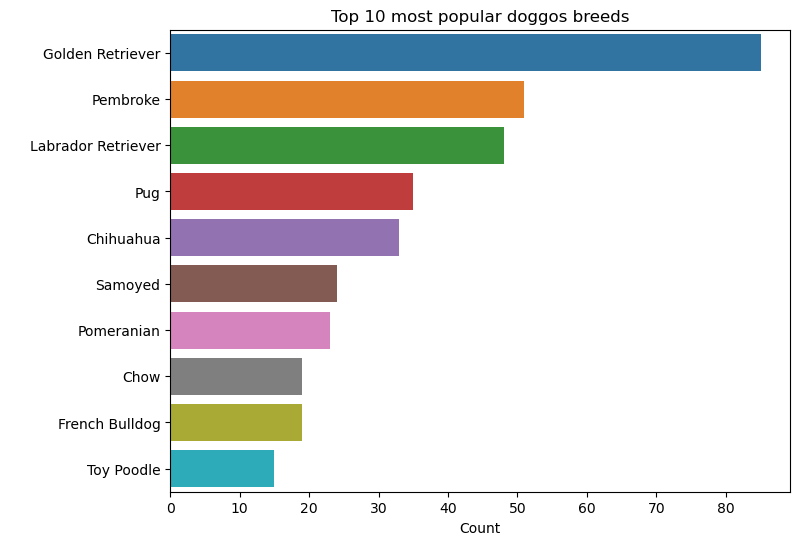

In [50]:

plt.figure(figsize=(8, 6))
sns.barplot(data=value_counts, x = 'p1', y ='index', orient='h')
plt.xlabel('Count')
plt.ylabel(' ')
plt.title('Top 10 most popular doggos breeds')
plt.show()

In [51]:
2. Has the profile WERATEDOGS gotten more popular with time?

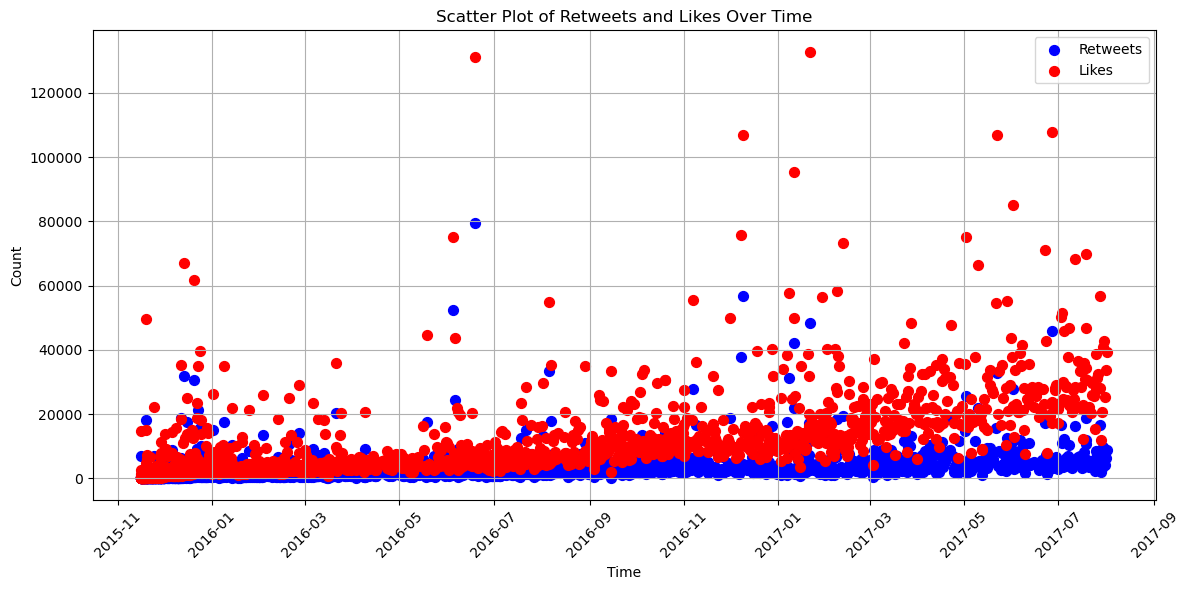

In [52]:
#create scatter plot that will show how retweets/likes changed over time
plt.figure(figsize=(12, 6))  

plt.scatter(final_result['timestamp'], final_result['retweet_count'], label='Retweets', c='blue', marker='o', s=50)
plt.scatter(final_result['timestamp'], final_result['fav_count'], label='Likes', c='red', marker='o', s=50)

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Scatter Plot of Retweets and Likes Over Time')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

We can see a slight upward trend especially for likes at the beginning of 2017, but because due to quite many outliers, the axis needs to incorporate pretty big values. I'll redo the plot only taking into consideration values that are equal or below 75 th percentile

In [53]:
final_result['fav_count'].describe()

count      1994.000000
mean       8895.725677
std       12213.193181
min          81.000000
25%        1982.000000
50%        4136.000000
75%       11308.000000
max      132810.000000
Name: fav_count, dtype: float64

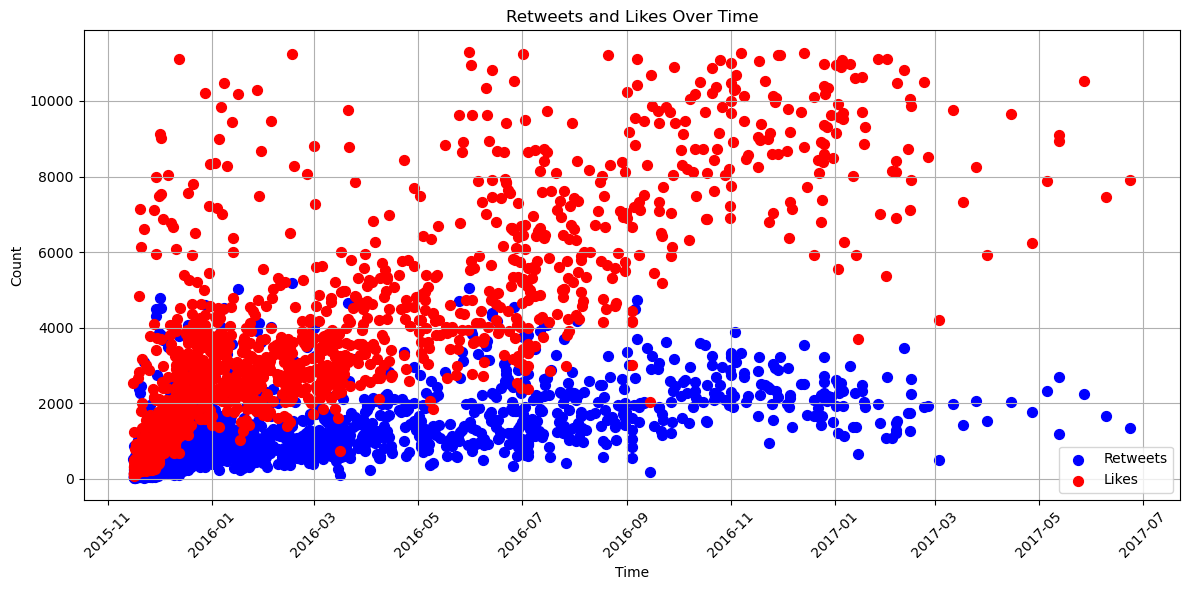

In [54]:
final_result_75th_percentile = final_result.query("fav_count<=11308")
plt.figure(figsize=(12, 6))  # Set the figure size

plt.scatter(final_result_75th_percentile['timestamp'], final_result_75th_percentile['retweet_count'], label='Retweets', c='blue', marker='o', s=50)
plt.scatter(final_result_75th_percentile['timestamp'], final_result_75th_percentile['fav_count'], label='Likes', c='red', marker='o', s=50)

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Retweets and Likes Over Time')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

3. On the graph above looks like we've had quite a lot of tweets in 2015 and less in 2017, let's check this

In [55]:
final_result['year'] = final_result['timestamp'].dt.year
yearly_tweet_count = final_result.groupby('year').agg({'tweet_id': 'count', 'fav_count': 'sum', 'retweet_count': 'sum'}).reset_index()
yearly_tweet_count.columns = ['Year', 'Tweet Count', 'Favorites Sum', 'Retweets Sum']
print(yearly_tweet_count)

   Year  Tweet Count  Favorites Sum  Retweets Sum
0  2015          663        1657008        717854
1  2016          974        7518578       2660493
2  2017          357        8562491       2138559


Indeed looks like the profile has gotten less active in 2017 - in 7 months of year 2017 we've got twice as less tweets as in just 2 months of 2015, but at the same time looks like popularity of WERATEDOGS increased with time, as they've started getting more likes and retweets